In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [2]:
data = pd.read_csv("../../raw_data/trimmed_data/wingman_viz.csv")
pd.set_option('display.max_columns', None)

data.set_index('id', inplace=True)
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [3]:
subcat_legend = {
    1: "Handling",
    2: "Systems",
    3: "Structural",
    4: "Propeller",
    5: "Power Plant",
    6: "Oper/Perf/Capability",
    7: "Fluids / Misc Hardware"
}

subcat_labels = [val for key, val in subcat_legend.items()]

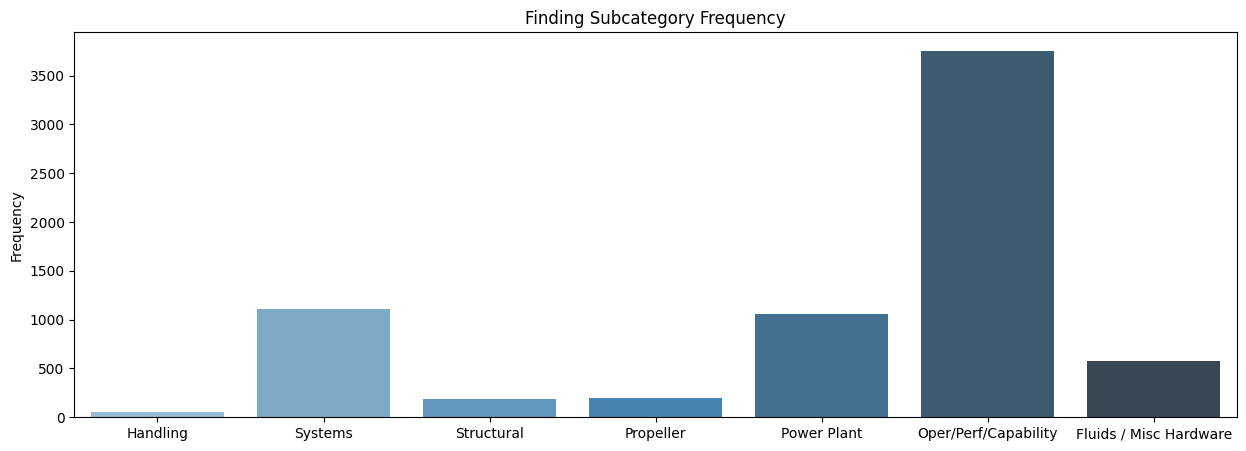

In [4]:
subcat_counts = data['subcategory_no'].value_counts()
sorted_subcats = subcat_counts.index.sort_values()

plt.figure(figsize=(15, 5))

ax = sns.barplot(x=sorted_subcats, y=subcat_counts[sorted_subcats], palette="Blues_d")

plt.title('Finding Subcategory Frequency')
plt.xlabel('')
plt.ylabel('Frequency')

ax.set_xticklabels(subcat_labels)
plt.xticks(rotation=0)

plt.show();

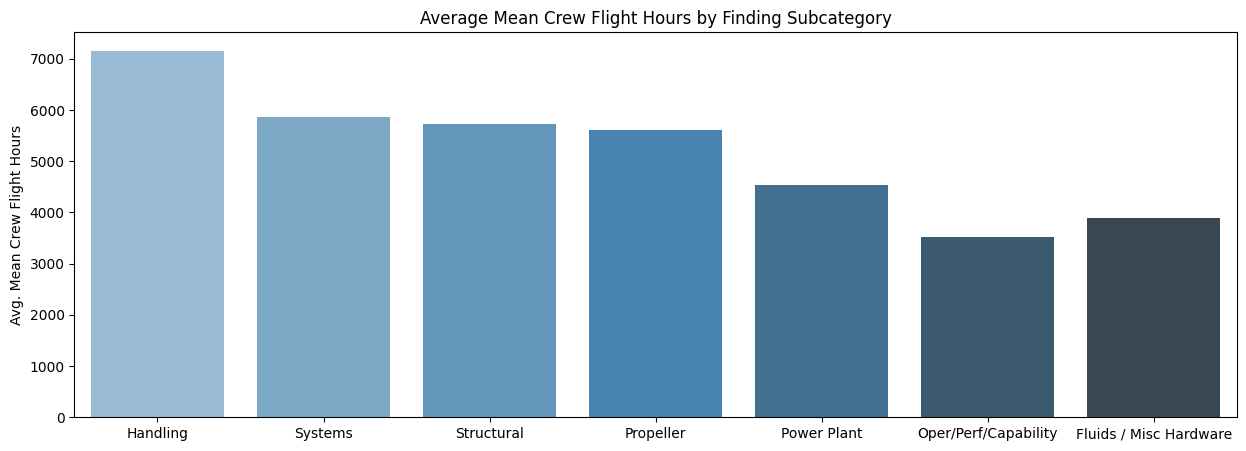

In [5]:
mean_flight_hours_cat = data.groupby('subcategory_no')['flight_hours_mean'].mean().reset_index()

plt.figure(figsize=(15, 5))

ax = sns.barplot(x='subcategory_no', y='flight_hours_mean', data=mean_flight_hours_cat, palette="Blues_d")

plt.title('Average Mean Crew Flight Hours by Finding Subcategory')
plt.xlabel('')
plt.ylabel('Avg. Mean Crew Flight Hours')

ax.set_xticklabels(subcat_labels)
plt.xticks(rotation=0)

plt.show();

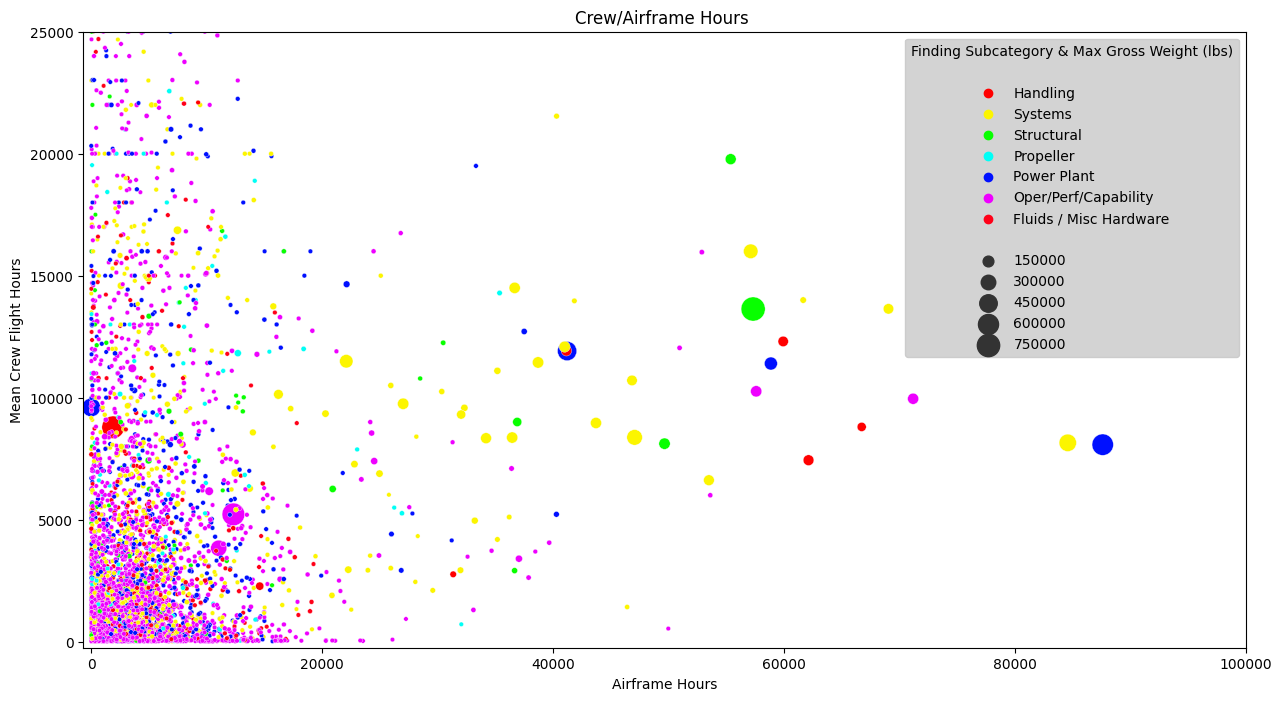

In [6]:
plt.figure(figsize=(15, 8))

ax = sns.scatterplot(x="afm_hrs", y="flight_hours_mean", hue='subcategory_no', size="cert_max_gr_wt", sizes=(10, 300), palette='hsv', data=data)

plt.title('Crew/Airframe Hours ')

plt.xlabel('Airframe Hours')
plt.ylabel('Mean Crew Flight Hours')

legend = ax.legend()
legend.set_title('Finding Subcategory & Max Gross Weight (lbs)')

legend_texts = legend.get_texts()
legend_texts[0].set_text('')
for i in range(1, 8):
    legend_texts[i].set_text(subcat_labels[i-1])
legend_texts[8].set_text('')

legend_frame = legend.get_frame()
legend_frame.set_facecolor('lightgray')
legend_frame.set_alpha(1)

plt.xlim(-700, 100_000)
plt.ylim(-250, 25_000)

ax.grid(False)

plt.show();

In [7]:
proba = [[ 0.68633303, 15.64000318,  2.4907375 ,  2.78677454, 16.5781061 ,
        53.05815674,  8.75988892]]

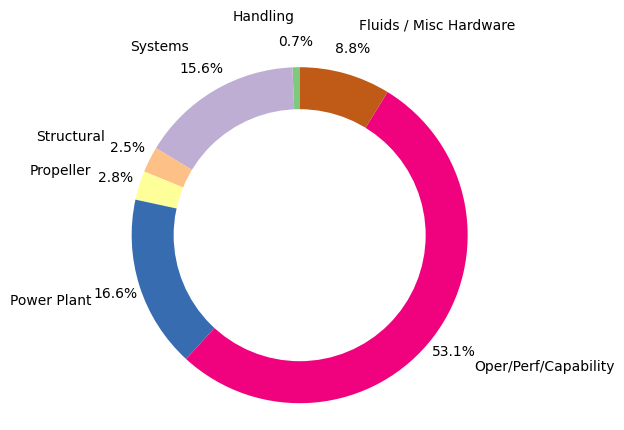

In [8]:
plt.pie(proba[0], labels=subcat_labels, autopct='%1.1f%%', startangle=90, pctdistance=1.15, labeldistance=1.3, colors=sns.color_palette("Accent", 7))

center_circle = plt.Circle((0, 0), 0.75, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.axis('equal')
plt.show();

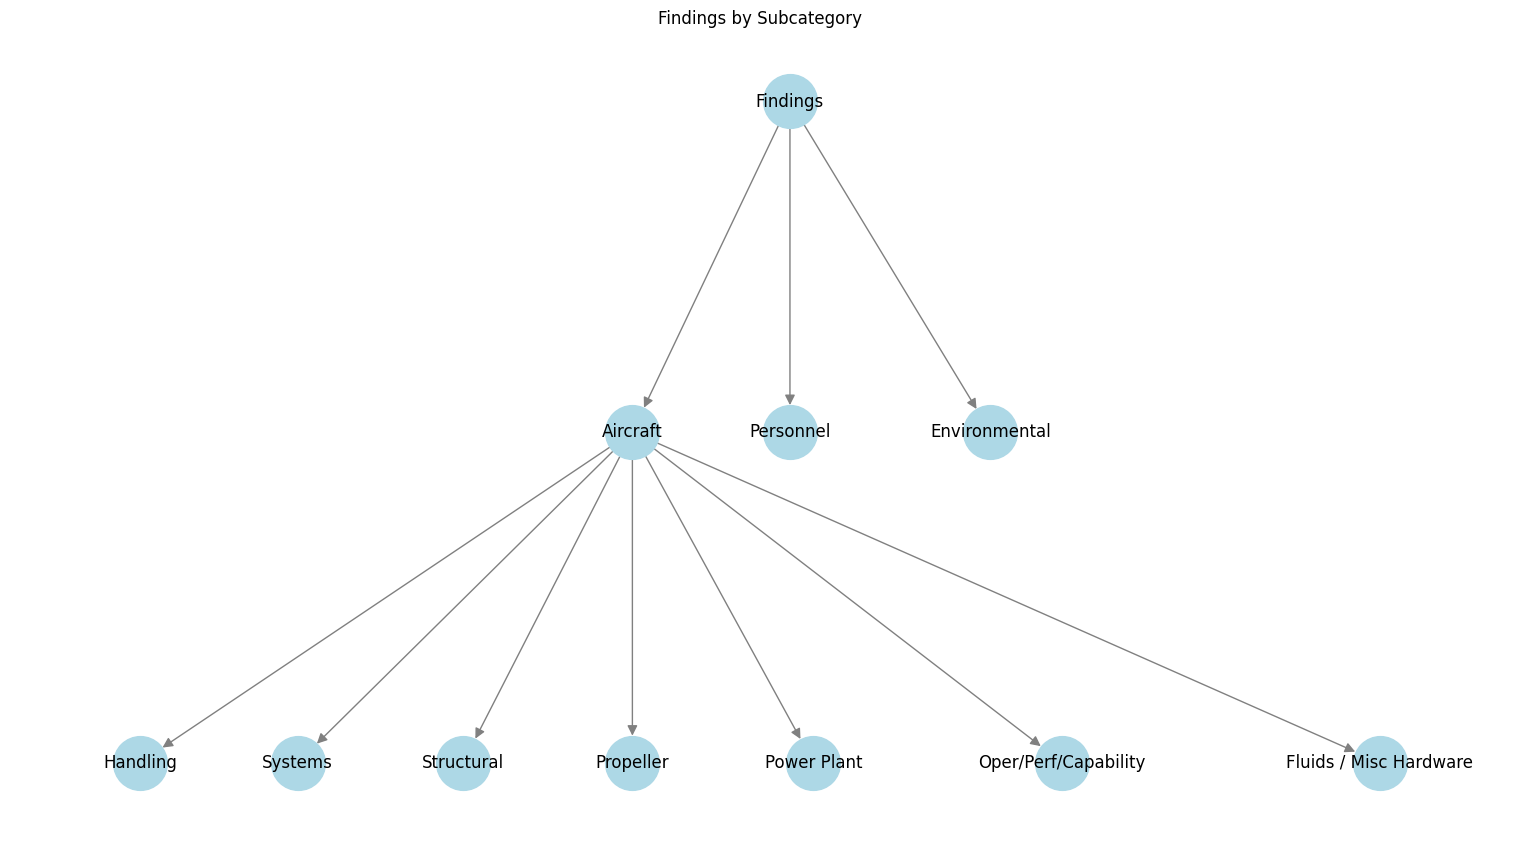

In [9]:
G = nx.DiGraph()

G.add_edges_from([
    ('Findings', 'Aircraft'),
    ('Findings', 'Personnel'),
    ('Findings', 'Environmental'),
    ('Aircraft', 'Handling'),
    ('Aircraft', 'Systems'),
    ('Aircraft', 'Structural'),
    ('Aircraft', 'Propeller'),
    ('Aircraft', 'Power Plant'),
    ('Aircraft', 'Oper/Perf/Capability'),
    ('Aircraft', 'Fluids / Misc Hardware'),
])

pos = nx.nx_agraph.graphviz_layout(G, prog='dot')
pos['Root'] = (0, 0)

# Increase the figure size
plt.figure(figsize=(15, 8))

nx.draw(G, pos, with_labels=True, node_size= 1500, node_color='lightblue', edge_color='gray', arrowsize=15)

plt.title('Findings by Subcategory')
plt.axis('off')

plt.show()